In [1]:
import gym
import gym2048
import pickle
import matplotlib.pyplot as plt
import math
import torch
%matplotlib inline

with open('./model/2023_02_22/fits_199.pickle', 'rb') as f:
    fitness = pickle.load(f)
with open('./model/2023_02_22/generation_199.pickle', 'rb') as f:
    pop = pickle.load(f)


UnpicklingError: NEWOBJ class argument isn't a type object

In [2]:
def plt_fitness(fitness, avg_len=10):
    tmp = fitness.copy()
    avg_fitness = []
    if avg_len == 1:
        avg_fitness = tmp
    else:
        for i in range(0, len(fitness), avg_len):
            avg_fitness.append(math.fsum(tmp[i:min(i+avg_len, len(fitness)-1)]) / len(tmp[i:min(i+avg_len, len(fitness)-1)]))
    plt.plot(range(0, len(fitness), avg_len), avg_fitness)
    plt.title('Population fitness')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.show()

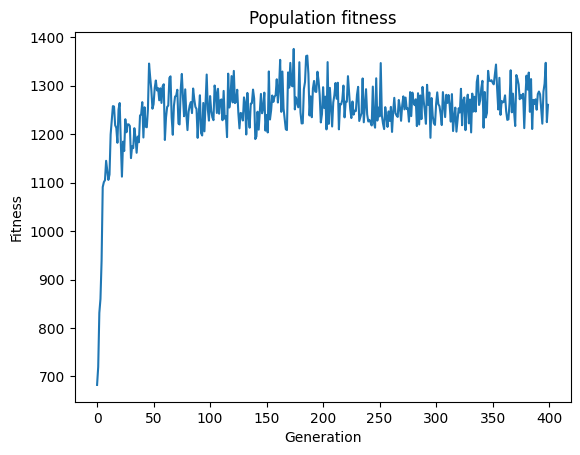

In [7]:
plt_fitness(fitness, 1)

In [8]:
pop.best_individual['fitness']

4176

In [5]:
import numpy as np
import tqdm
score = []
with gym.make('gym2048-v0', disable_env_checker=True, render_mode="human") as env:
    best_individual = pop.best_individual
    model = pop.model
    for i in range(1):
        print('.', end='')
        done = False
        obs, _ = env.reset()
        # obs = np.array([[
        #     [32, 128,16, 2],
        #     [16, 32, 4,  32],
        #     [4,  8,  32, 16],
        #     [2,  4,  8,  2]
        # ]])
        # env.env.set_map(obs)
        while not done:
            state = torch.from_numpy(obs).float()
            action = torch.distributions.Categorical(probs=model(state, best_individual['params'])).sample().item()
            obs, reward, done, _, info = env.step(action)
        score.append(env.env.count_reward)

....................................................................................................

Avg score: 1368.32
Socre sigma: 869.8643443664075


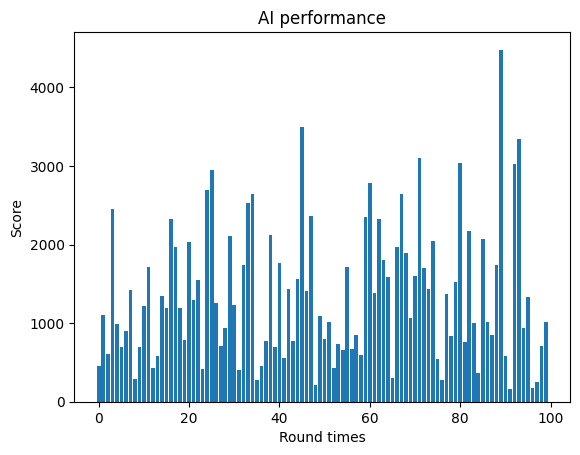

In [6]:
avg_len = 1
tmp = score.copy()
avg_fitness = []
if avg_len == 1:
    avg_fitness = tmp
else:
    for i in range(0, len(score), avg_len):
        avg_fitness.append(math.fsum(tmp[i:min(i+avg_len, len(score)-1)]) / len(tmp[i:min(i+avg_len, len(score)-1)]))
plt.bar(range(0, len(score), avg_len), avg_fitness)
score = np.array(score)
print("Avg score:", score.mean())
print('Socre sigma:', score.std())
plt.title('AI performance')
plt.xlabel('Round times')
plt.ylabel('Score')
plt.show()

In [2]:
env = gym.make('gym2048-v0', disable_env_checker=True)
o, _ = env.reset()
obs = np.array([[
            [32, 128,16, 2],
            [16, 32, 4,  32],
            [4,  8,  32, 16],
            [2,  4,  8,  2]
        ]])
env.env.set_map(obs)

array([[[0, 0, 0, 0],
        [0, 2, 0, 0],
        [0, 0, 2, 0],
        [0, 0, 0, 0]]])

In [74]:
#UP
o, _, d, _, i = env.step(0)

In [66]:
#DOWN
o, _, d, _, i = env.step(1)

In [47]:
#RIGHT
o, _, d, _, i = env.step(3)

In [25]:
#LEFT
o, _, d, _, i = env.step(2)

In [75]:
d, i

(False,
 {'action_dict': {0: 'UP',
   1: 'DOWN',
   2: 'LEFT',
   3: 'RIGHT',
   'UP': 0,
   'DOWN': 1,
   'LEFT': 2,
   'RIGHT': 3},
  'max_value': 64,
  'count_score': 226,
  'is_last_move_illegal': True,
  'illegal_move_count': 1,
  'interrupted_count': 1000})

In [ ]:
env.close()